# Hopkins et al polnomial fit for n(S)

http://arxiv.org/pdf/1210.7521v1.pdf 

$log[(\frac{dN}{dS})/(S^{−2.5}))] = \sum a_i(log[S/mJy])$

valid from 0.05mJy to 1Jy

In [37]:
%pylab inline
from scipy import *
def p(s):
    a=array([-0.008, 0.057, -0.121, -0.049, 0.376, 0.508, 0.859])
    lns=polyval(a,s)
    return lns
print p(0.9)
def p2(s):
    val= 0.859 + 0.508*s+ 0.376*s*s -0.049*s**3 -0.121*s**4 +0.057*s**5 -0.008*s**6
    return val
print p2(0.9)

Populating the interactive namespace from numpy and matplotlib
1.535057302
1.535057302


`%matplotlib` prevents importing * from pylab and numpy


In [38]:
#Huynh, M. T., Jackson, C., Norris, R. P., & Prandoni, I. 2005, AJ, 130, 1373
def h(s): #S in mJy
    jy=s/1000.
    ls=np.log10(s)
    a=0.841 + 0.54*ls +0.364*ls**2 -0.063*ls**3 -0.107*ls**4 +0.052*ls**5 -0.007*ls**6
    la=np.log10(a)
    dnds=jy**2.5*10**la
    return dnds

print h(.1)

    

5.62e-11


In [39]:
#fluxes=arange(0.05,1000,0.1)
#x=log10(fluxes)
x=arange(-1.3,3.0,0.05)
#print(x[4])
y=zeros(len(x))
y=p(x)
#print x,len(x)
#print y,len(y)

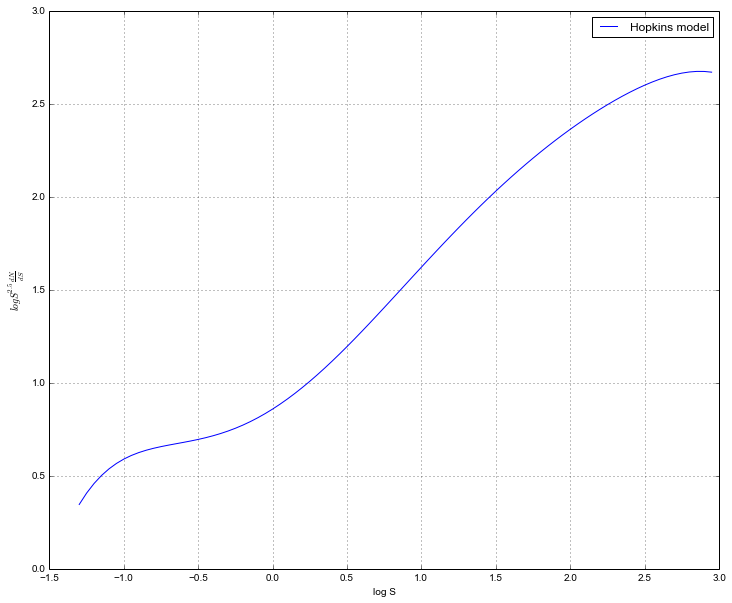

In [40]:
pylab.figure(1,figsize=(12,10))
pylab.plot(x,y,label='Hopkins model') #$S^{2.5} \frac{dN}{dS}$
pylab.ylabel(r'$log S^{2.5}\frac{dN}{dS}$')
pylab.xlabel("log S")
pylab.grid()
pylab.legend()
pylab.show()

Vernstrom, Norris, Scott, Wall 
http://arxiv.org/pdf/1408.4160v1.pdf have a formula for n>S for a frequency f(GHz)

$N(>S) = 296700 \times ( {\frac{S}{\mu Jy}}^{-1.20} {\frac{\nu}{1.4 GHz}}^{-0.33}) {deg}^{-2}$


In [41]:
def vern(s,f):
    # scale  from Jy to microJy
    s=s*1.e6
    #scale f to 1.4GHz
    f=f/1.4
    if s< 5:
        n=84800/(s**(0.48) * f**(0.33)) # sources per square degree
    else: 
        n=296700/(s**1.20 * f**(0.33)) # valid to about 0.5mJy
    return n # sources per square degree greater than this flux
    
def confusion(theta,f): # from Condon, also in Shea Brown, also in Harper et al.
    s=0.2 * theta**2 / f**0.7
    return s # in  mJy


def conf2(theta,f): #from Resolving the Radio Source Background Condon et al 2011
    a8= theta*60./8. # convert to 8arcsec
    f3 = f/3.02 # convert to 3.02GHz
    sig=1.2e-3 * f3**(-0.7) *a8**(10./3.) # milliJy
    return sig # really for microJy range

def conf3(theta,f): #from Bernardi et al 2014 LEDA preprint
    sig= 200*(theta/16.)**2 *(f/0.150)**(-0.7) # to mJy
    return sig



In [52]:
print confusion(2,1.3) , conf2(2,1.3) , conf3(2,1.3) # 1 arcminute beam at 1.3GHz

0.665778306858 18.0189697567 0.689213152108


In [43]:
print vern(1e-3,1.4) #number of milliJansky sources

74.5276704229


In [44]:
print vern(10e-3,1.4) # about where Vernstrom ends at 10mJy

4.70237810203


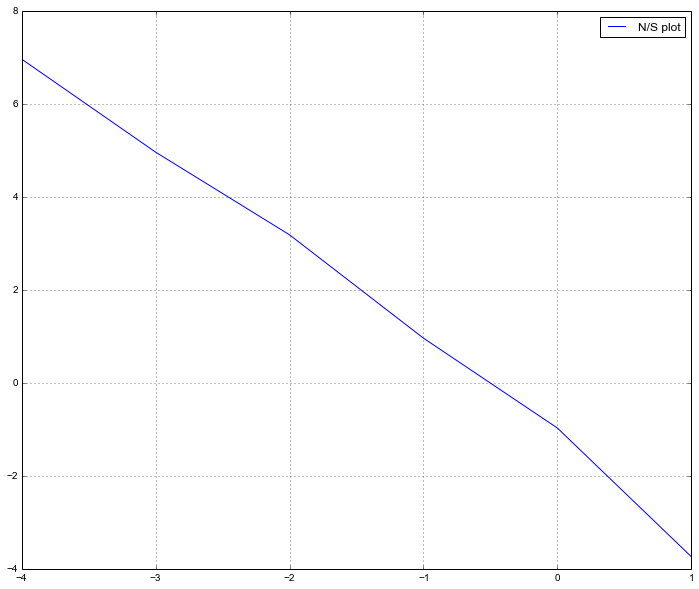

In [45]:
"""
Taken from a plot
"""
deg=pi/180
#print deg**2 # correction from steradians to degrees

from numpy import log10
n=log10((3e10,3.0e8,5.0e6,3.0e4,3.5e2,0.6)) +2*log10(deg)
s=(-4,-3,-2,-1,0,1)
pylab.figure(1,figsize=(12,10))
pylab.plot(s,n,label='N/S plot') 
pylab.grid()
pylab.legend()
pylab.show()

# ATLBS
source area 8.42 $deg^2$ at 1.4GHz (1.38)
## counts
* |     range | av | number|
* |   0.4–0.8 |   0.59 |364 |
* |   0.8–1.6 |   1.10 |289 |
* |   1.6–3.2 |   2.22 |140 |
* |   3.2–6.4 |   4.63 |104 |
* |   6.4–12.8|   8.83 | 70 |
* |  12.8–25.6|  17.3  | 46 | 
* |  25.6–51.2|  36.3  | 30 |
* | 51.2–102.4|  76.5  | 11 |
* |102.4–204.8| 144.5  |  7 |
* |204.8–409.6| 268.4  |  2 |



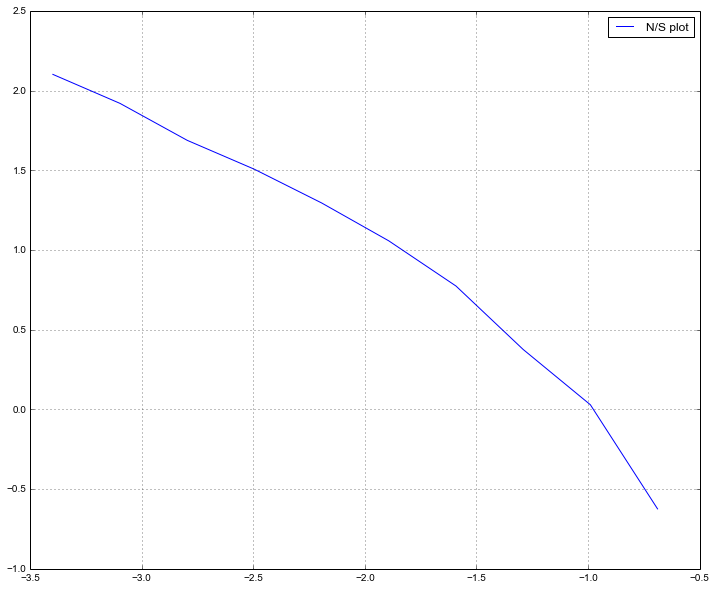

In [46]:
s=log10((204.8, 102.4, 51.2, 25.6, 12.8, 6.4, 3.2, 1.6, 0.8, 0.4)) -3 # subtract 3 to get Jy scale
#print len(s)
n=log10((2,(2+7),(2+7+11),(2+7+11+30),(2+7+11+30+46),(2+7+11+30+46+70),\
        (2+7+11+30+46+70+104),(2+7+11+30+46+70+104+140),(2+7+11+30+46+70+104+140+289),(2+7+11+30+46+70+104+140+289+364)))\
        -log10(8.42)
#print len(s),len(n)
pylab.figure(1,figsize=(12,10))
pylab.plot(s,n,label='N/S plot') 
pylab.grid()
pylab.legend()
pylab.show()

In [47]:
# number of sources >1mJy
N=2+7+11+30+46+70+104+140+289
area=8.42
print " sources per sq deg > 0.8mJy", N/area

 sources per sq deg > 0.8mJy 83.0166270784


# Values from the Phoenix survey 

see http://arxiv.org/pdf/1606.05953v1.pdf table 2

* |Epoch |Area $deg^2$| $\frac{\sigma}{mJy}$ | N  |
* | 1    | 2.09       | 3.35        | 336|
* | 2    | 1.10       | 2.48        | 410|
* | 3    | 0.50       | 1.58        | 453|
* | 4    | 0.83       | 0.97        | 498|
* | 5    | 1.08       | 0.61        | 594|
* | 6    | 0.28       | 0.72        | 328|


In [53]:
print "Number above 3.35mJy ", int(336/2.09), "per square deg"
print "Number above 2.48mJy ", int(410/1.10), "per square deg"
print "Number above 1.58mJy ", int(453/0.50), "per square deg"
print "Number above 0.97mJy ", int(498/0.83), "per square deg"
print "Number above 0.61mJy ", int(594/1.08), "per square deg"
print "Number above 0.72mJy ", int(328/0.72), "per square deg"
print "This is clearly WRONG"

Number above 3.35mJy  160 per square deg
Number above 2.48mJy  372 per square deg
Number above 1.58mJy  906 per square deg
Number above 0.97mJy  600 per square deg
Number above 0.61mJy  550 per square deg
Number above 0.72mJy  455 per square deg
This is clearly WRONG


#Extragalactic + Galactic background outside the plane

$T_{sky} = 5.0 ( {\frac{\nu}{710MHz}})^{-2.6}  K$

also have from Fixsen

$T_{sky} = 24.1 ( {\frac{\nu}{310MHz}})^{-2.599}  K$

And Sieffert 2012  for extragalactic

$T_{sky} = 0.110 ( {\frac{\nu}{1.4GHz}})^{-2.28}  K$


In [49]:
def t1(f):
    f7=f/0.71 # from GHz to scale freq
    x=5.0*f7**(-2.6)
    return x

def t2(f):
    f3= f/0.31 #from GHz to scale freq
    x= 24.1*f3**(-2.599)
    return x

def t3(f): # Extragalactic 
    f1=f/1.4
    x=0.110*f1**(-2.28) 
    return x

print t1(1.8),t2(1.8),t3(1.8)


0.44517749126 0.249237188787 0.0620216470026


In [50]:
print t1(1.4) , t2(1.4), t3(1.4)

0.85567495019 0.478938026278 0.11
